# attempt 1 at data visulaisation

In [1]:
import numpy as np
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv"
df_students = pd.read_csv(url,delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


# Importing Matplotlib

In [3]:
from matplotlib import pyplot as plt

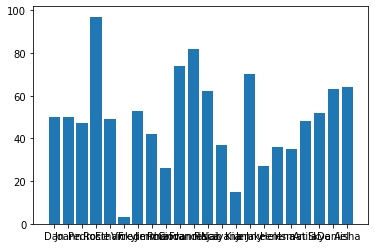

In [4]:
plt.bar(x=df_students.Name, height=df_students.Grade)
plt.show()

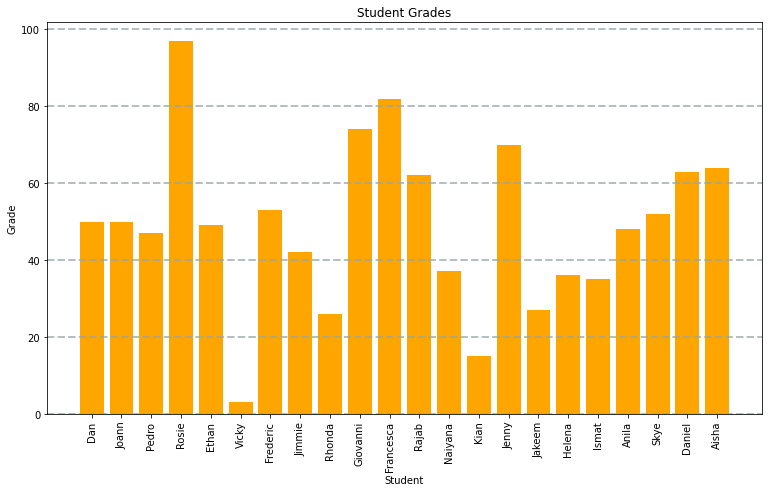

In [6]:
fig = plt.figure(figsize=(12.8, 7.2))
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

C:\Users\simon\AppData\Local\Temp\ipykernel_18472\1436118017.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students.Name, rotation=90)
C:\Users\simon\AppData\Local\Temp\ipykernel_18472\1436118017.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


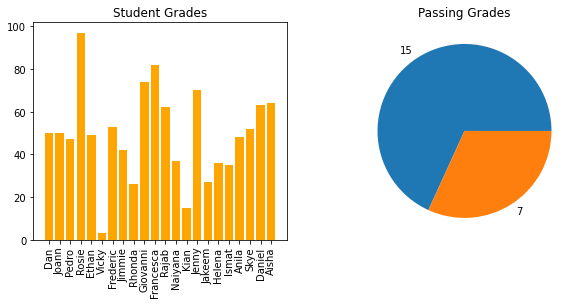

In [11]:
from cProfile import label


fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')

ax[0].set_title("Student Grades")
ax[0].set_xticklabels(df_students.Name, rotation=90)

passes_count = df_students.Pass.value_counts()
ax[1].pie(passes_count, labels=passes_count)
ax[1].set_title("Passing Grades")

fig.show()

<AxesSubplot:xlabel='Name'>

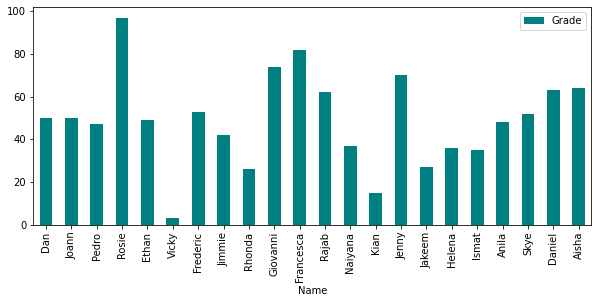

In [13]:
df_students.plot.bar(x='Name', y='Grade', figsize=(10,4), color= 'teal')

C:\Users\simon\AppData\Local\Temp\ipykernel_18472\2066533379.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


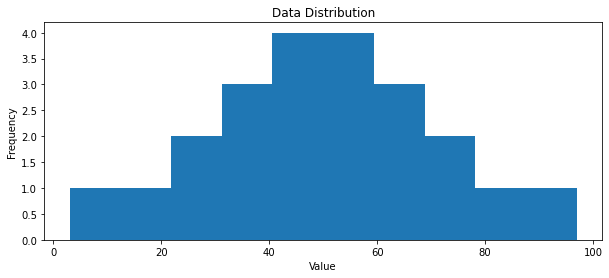

In [14]:
grades = df_students.Grade

fig=plt.figure(figsize=(10,4))

plt.hist(grades)
plt.title("Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig.show()

Minimum: 3.0
Maximum Value: 97.0
Mean Value: 49.18181818181818
Median_value: 49.5
 Mode Value: 50.0


C:\Users\simon\AppData\Local\Temp\ipykernel_18472\3832605860.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


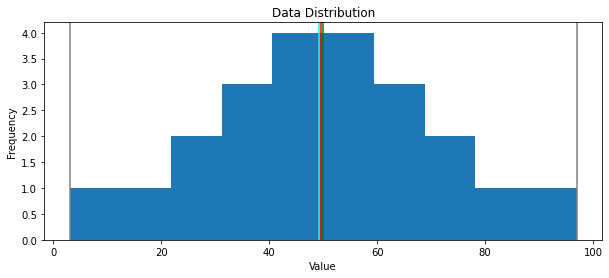

In [16]:
from cgitb import grey
from turtle import color


grades = df_students.Grade

min_value = df_students.Grade.min()
max_value = df_students.Grade.max()
mean_value = df_students.Grade.mean()
median_value = df_students.Grade.median()
mode_value = df_students.Grade.mode()[0]

print(f'Minimum: {min_value}\nMaximum Value: {max_value}\nMean Value: {mean_value}\nMedian_value: {median_value}\n Mode Value: {mode_value}')

fig=plt.figure(figsize=(10,4))

plt.hist(grades)

plt.axvline(x=min_value, color='grey')
plt.axvline(x=max_value, color='grey')
plt.axvline(x=mean_value, color='cyan')
plt.axvline(x=median_value, color='red')
plt.axvline(x=mode_value, color='green')

plt.title("Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig.show()

C:\Users\simon\AppData\Local\Temp\ipykernel_18472\2847058452.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


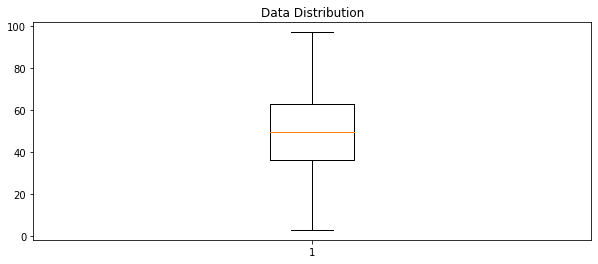

In [17]:
grades = df_students.Grade

fig = plt.figure(figsize=(10,4))

plt.boxplot(grades)

plt.title("Data Distribution")

fig.show()

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\simon\AppData\Local\Temp\ipykernel_18472\3494303138.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


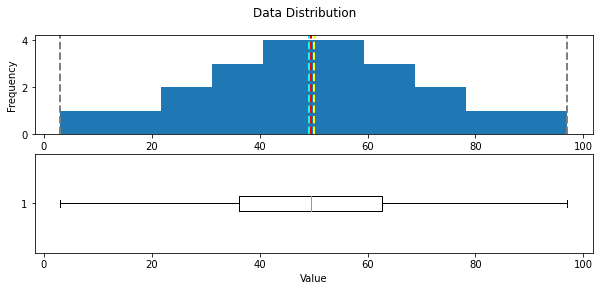

In [18]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()
    
# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col)

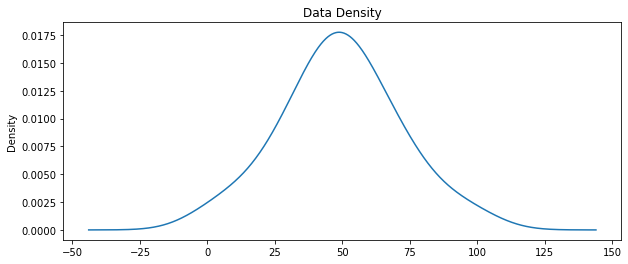

In [19]:
def show_density(data):
    fig = plt.figure(figsize=(10,4))

    data.plot.density()

    plt.title('Data Density')

    plt.show()

show_density(df_students.Grade)